# Problem 1, Parts F-H: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 1 parts F-H by filling in the sections marked `# TODO` and running all cells.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 1F: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 4C-E. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [4]:
def loss(X, Y, w):
    """
    Calculate the squared loss function.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.

    Outputs:
        The loss evaluated with respect to X, Y, and w.
    """

    # ==============================================
    # TODO: Implement the SGD loss function.
    # ==============================================

    return np.sum((np.dot(X, w) - Y) ** 2)


def gradient(x, y, w):
    """
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.

    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.

    Output:
        The gradient of the loss with respect to x, y, and w.
    """

    # ==============================================
    # TODO: Implement the gradient of the loss function.
    # ==============================================

    return 2 * (np.dot(w, x) - y) * x


def SGD(X, Y, w_start, eta, N_epochs):
    """
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.

    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    """

    # ==============================================
    # TODO: Implement the SGD algorithm.
    # ==============================================

    w = w_start
    losses = []
    for epoch in range(N_epochs):
        for i in np.random.permutation(len(X)):
            x, y = X[i], Y[i]
            w = w - eta * gradient(x, y, w)
        # at the end of each epoch, store loss
        losses.append(loss(X, Y, w))

    return w, np.array(losses)

Next, we need to load the dataset. In doing so, the following function may be helpful:

In [5]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.

    Inputs:
        filename: GeneratorExitiven as a string.

    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=",")

Now, load the dataset in `../data/sgd_data.csv` and run SGD using the given parameters; print out the final weights.

In [7]:
# ==============================================
# TODO:
# (1) load the dataset
# (2) run SGD using the given parameters
# (3) print out the final weights.
# ==============================================

data = load_data("../data/sgd_data.csv")
X = data[:,:4]
Y = data[:,4]

# add additional dimension of all 1s as X[:,0]
X = np.concatenate([np.ones(shape=(X.shape[0], 1)), X], axis=1)

# set hyperparameters
w_start = [0.001] * X.shape[1]
eta = np.exp(-15)
N_epochs = 800

# run SGD
w, losses = SGD(X, Y, w_start, eta, N_epochs)

# print final (bias and) weights
print(w)

[ -0.22717502  -5.94209879   3.94391613 -11.72383161   8.78568644]


## Problem 1G: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

In [18]:
# ==============================================
# TODO: create a plot showing the convergence
# of SGD for the different learning rates.
# ==============================================

etas = [np.exp(-i) for i in range(10, 16)]
losses_by_eta = []
for eta in etas:
    w, losses = SGD(X, Y, w_start, eta, N_epochs)
    losses_by_eta.append(losses)
    print(f"final weights for eta={eta}: {w}")
    print(f"final loss for eta={eta}: {losses[-1]}")

final weights for eta=4.5399929762484854e-05: [ -0.31794141  -5.99639534   4.00894825 -11.94558327   8.98226221]
final loss for eta=4.5399929762484854e-05: 4099.785948947816
final weights for eta=1.670170079024566e-05: [ -0.30390807  -5.99117282   4.0160122  -11.93229814   8.99068916]
final loss for eta=1.670170079024566e-05: 4071.7563847365427
final weights for eta=6.14421235332821e-06: [ -0.27135919  -5.99201776   4.0144565  -11.93340497   8.99036846]
final loss for eta=6.14421235332821e-06: 4072.562118542952
final weights for eta=2.2603294069810542e-06: [ -0.24578114  -5.99513757   4.01179091 -11.93637511   8.98742807]
final loss for eta=2.2603294069810542e-06: 4071.5190926942887
final weights for eta=8.315287191035679e-07: [ -0.23248201  -5.99570176   4.01114221 -11.93663829   8.98663332]
final loss for eta=8.315287191035679e-07: 4071.6742889339966
final weights for eta=3.059023205018258e-07: [ -0.22717608  -5.94209783   3.94390931 -11.72383229   8.78568811]
final loss for eta=3.05

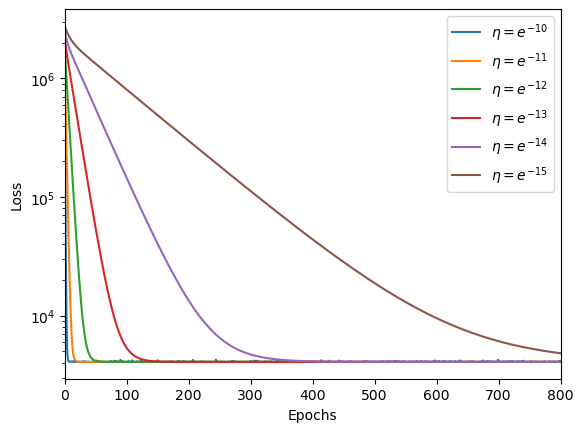

In [10]:
plt.figure()
for i in range(len(etas)):
    plt.plot(losses_by_eta[i], label=f"$\eta = e^{{{int(np.log(etas[i]))}}}$")
plt.xlim(0, N_epochs)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.semilogy()
plt.legend()
plt.savefig("losses_by_eta.pdf")
plt.show()

## Problem 1H

Provide your code for computing the least-squares analytical solution below.

In [14]:
# ==============================================
# TODO: implement the least-squares
# analytical solution.
# ==============================================

# analytical solution
w = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(Y))
# print weights
print(w)

[ -0.31644251  -5.99157048   4.01509955 -11.93325972   8.99061096]
